In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Set plotting parameters.
sns.set(font_scale=1.5)
sns.set_palette("tab10")

In [61]:
def plot_from_results_file(filepath, env, algos, fig=None, ax=None):
    
    # Extract the results
    results = pd.read_csv(filepath)
    results = results[results['env'] == env]
    
    # Plot the training curves.
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))

    for algo in algos:
        r = results[results['algo'] == algo]
        x = r['n_frames']
        mu = r['mean_return']
        std = r['std_return']

        ax.plot(x, mu, label=algo)
        ax.fill_between(mu, mu - std, mu + std, alpha=0.4)

    ax.legend()
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Cumulative reward')
    
    return fig, ax

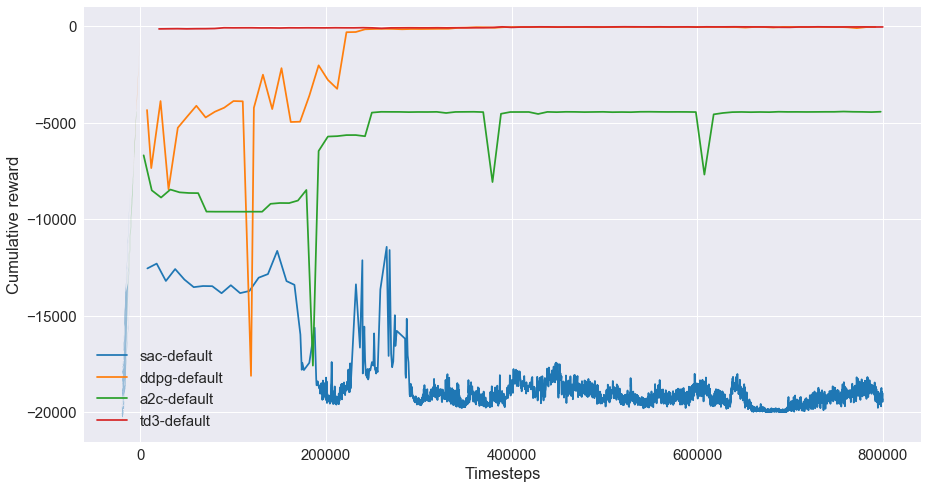

In [62]:
# Plot Gaspard's runs.
env = 'anm'
algos = ['sac-default', 'ddpg-default', 'a2c-default', 'td3-default']
filepath = '~/Code/gym-anm_exps/results/gaspard-results.csv'
fig, ax = plot_from_results_file(filepath, env, algos)

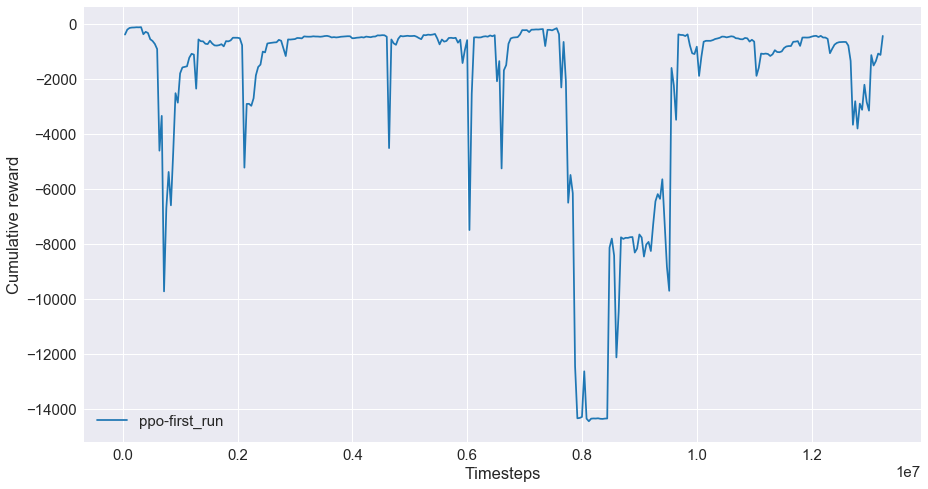

In [67]:
# Add PPO results.
algos = ['ppo-first_run']
filepath = '~/Code/gym-anm_exps/results/anm-ppo-first_run-2020.csv'
fig, ax = plot_from_results_file(filepath, env, algos)